# General Description:

For CRDM

Plotting choice as a function of the lottery amount, subdivded by lottery probabilities and ambuguity levels.

Importing libraries and mounting Google Drive

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os,sys


In [75]:
def count_tuples(listA):
  unique_items = list(set(listA))
  item_count = [listA.count(item) for item in unique_items]
  return unique_items,item_count

In [76]:
def tabulate_col(fn,df,col='crdm_sure_amt'):
    count_df = df[col].value_counts().sort_index()
    count_df = count_df.reset_index()
    print(count_df)
    #create .csv file with this info
    print("Saving to: {}".format(fn))
    count_df.to_csv(fn)

In [77]:
def count_lott_p_sure_amt_amb(fn_helper):
  df = pd.read_csv(fn_helper)
  #Adding the lotterys
  df['crdm_lott_amt'] = df['crdm_lott_bot'] +  df['crdm_lott_top']
  #0's are now choosing immediate, 1 is choosing delay
  # df['crdm_trial_resp.corr'] = 1.0 - df['crdm_trial_resp.corr']
  # get unique amounts that are "task" trials

  for col in ['crdm_sure_amt','crdm_amb_lev','crdm_lott_p','crdm_lott_amt']:
    fn = os.path.join('csv','{}.csv'.format(col))
    tabulate_col(fn,df,col=col)


In [78]:
def drop_blank(df):
    df = df.loc[df['crdm_trial_type']=='task'] 
    df_len = df.shape[0]
    df['responded'] = df['crdm_trial_resp.keys'].notna()
    if not df['responded'].all():
        non_responses_nb = df['responded'].value_counts()[False]
        print('\n**WARNING** We dropped {0} of {1} non responses that were left blank'.format(non_responses_nb,df_len))
        df = df.loc[df['responded'],:].reset_index(drop=True)    
    return df
        

In [79]:
# split dataframe by gains/losses
def get_by_domain(df,domain='gain',task='crdm',verbose='False'):
    if verbose:
        print('Working on this domain: {}'.format(domain))
    # select by domain: gain/loss
    domain_col = '{}_domain'.format(task)
    df = df.loc[df[domain_col]==domain]
    return df

In [80]:
def get_subject(fn):
  subj = os.path.basename(fn).replace('_crdm.csv','')
  return subj

In [81]:
# confidence responce column has been a moving target. this will help centralize any future fixes if necessary
def get_confresp(df,task='crdm'):
    if '{}_confkey'.format(task) in list(df):
        return '{}_confkey'.format(task)
    elif '{}_conf_resp.keys'.format(task) in list(df):
        return '{}_conf_resp.keys'.format(task)
    else:
        print('Whoops could not find confidence response colums: {}'.format(list(df)))
        print('**EXITING NOW**')
        sys.exit()

In [82]:
# written for SDAN data, when None started appearing instead of empty or Nan, can match any string, default to 'None'
# The None shows up as a Nan on my laptop but 'None' in other computers
# crdm_confkey
def drop_by_str(df,col='crdm_conf_resp.keys',match_str='None'):
    drops=0
    if df[ col ].dtype == 'float64':
        return df,drops

    df1_len = df.shape[0]
    try:
        df = df.loc[ df[ col ].str.contains( match_str )==False ].reset_index(drop=True)
    except AttributeError:
        print(df[col])
        print('Something up with col : {}'.format(col))
        sys.exit()
    df2_len = df.shape[0]
    drops = df1_len-df2_len
    if drops>0:
        print('**WARNING** We dropped {} rows from column {} containing >>>{}<<<\n'.format(drops,col,match_str))
    return df,drops

In [83]:
path= 'z:/datasets/ICR'
split_dir = os.path.join(path,'split') 
utility_dir = os.path.join(path,'utility')
fn_helper = os.path.join(split_dir,'NIH116_C/crdm/NIH116_C_crdm.csv')
count_lott_p_sure_amt_amb(fn_helper)

   index  crdm_sure_amt
0   -5.0             59
1    5.0             59
Saving to: csv\crdm_sure_amt.csv
   index  crdm_amb_lev
0    0.0            75
1   24.0            14
2   50.0            14
3   74.0            15
Saving to: csv\crdm_amb_lev.csv
   index  crdm_lott_p
0   13.0           15
1   25.0           15
2   38.0           14
3   50.0           57
4   75.0           17
Saving to: csv\crdm_lott_p.csv
    index  crdm_lott_amt
0   -50.0              8
1   -40.0              9
2   -30.0              8
3   -20.0              9
4   -15.0              8
5    -8.0              9
6    -5.0              8
7     5.0              8
8     8.0              8
9    15.0              8
10   20.0              9
11   30.0              8
12   40.0              9
13   50.0              9
Saving to: csv\crdm_lott_amt.csv


Use the results from above to define upper and lower bounds and ylabels and titles

z:/datasets/ICR\split\NIH116_C\crdm\NIH116_C_crdm.csv
Working on this domain: gain
**WARNING** We dropped 9 rows from column crdm_conf_resp.keys containing >>>None<<<



C:\Users\guardomayas2\AppData\Local\Temp\ipykernel_1312\2149383568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['responded'] = df['crdm_trial_resp.keys'].notna()


Saving to: z:/datasets/ICR\utility\NIH116_C\crdm/NIH116_C_crdm_lottery_amt_choice_gain.csv
Saving to: z:/datasets/ICR\utility\NIH116_C\crdm/NIH116_C_crdm_plot_lottery_amt_choice_gain.png


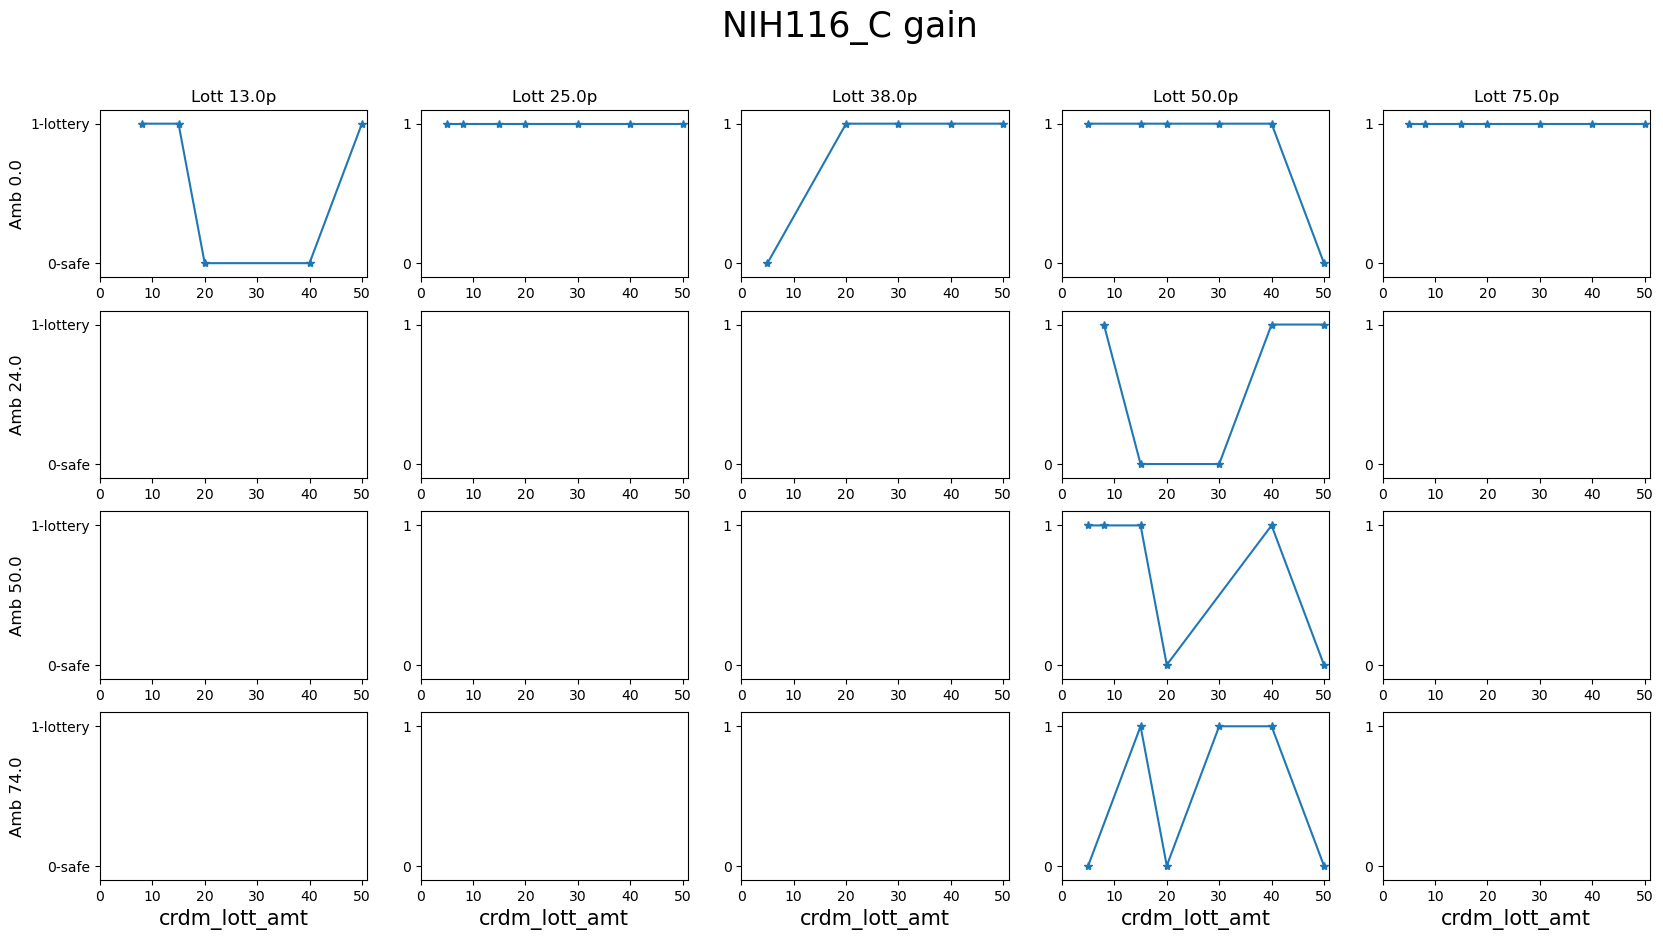

z:/datasets/ICR\split\NIH116_C\crdm\NIH116_C_crdm.csv
Working on this domain: loss
**WARNING** We dropped 14 rows from column crdm_conf_resp.keys containing >>>None<<<



C:\Users\guardomayas2\AppData\Local\Temp\ipykernel_1312\2149383568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['responded'] = df['crdm_trial_resp.keys'].notna()


Saving to: z:/datasets/ICR\utility\NIH116_C\crdm/NIH116_C_crdm_lottery_amt_choice_loss.csv
Saving to: z:/datasets/ICR\utility\NIH116_C\crdm/NIH116_C_crdm_plot_lottery_amt_choice_loss.png


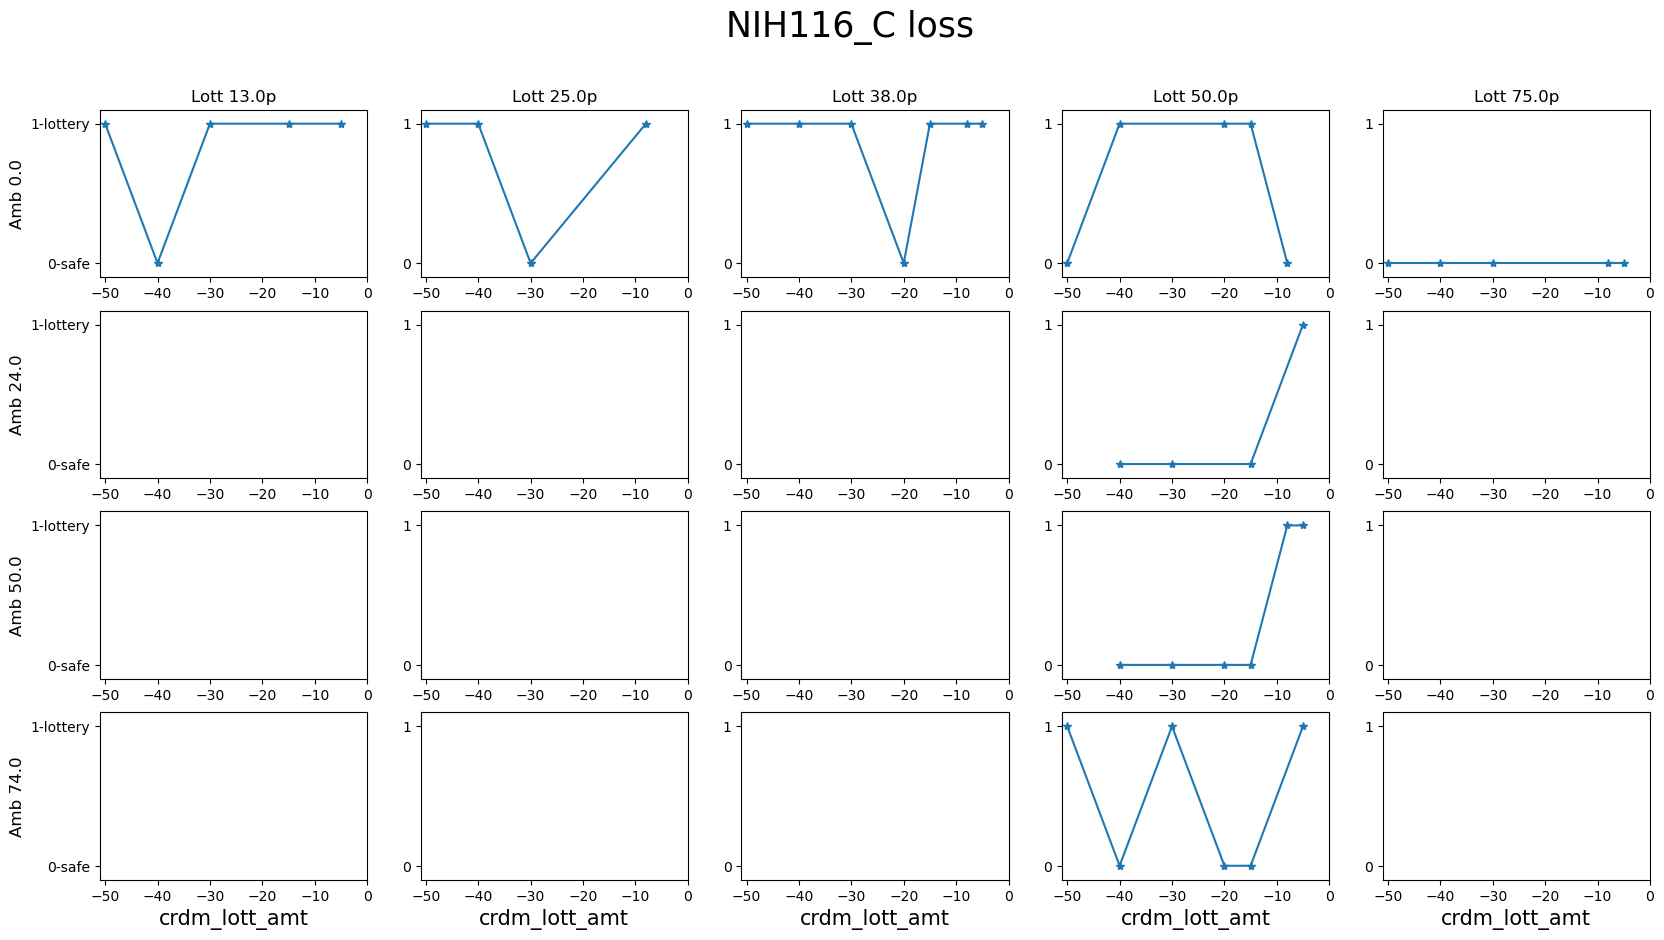

z:/datasets/ICR\split\NIH116_C\crdm\NIH116_C_crdm.csv
**WARNING** We dropped 23 rows from column crdm_conf_resp.keys containing >>>None<<<



C:\Users\guardomayas2\AppData\Local\Temp\ipykernel_1312\2149383568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['responded'] = df['crdm_trial_resp.keys'].notna()


Saving to: z:/datasets/ICR\utility\NIH116_C\crdm/NIH116_C_crdm_lottery_amt_choice_combined.csv
Saving to: z:/datasets/ICR\utility\NIH116_C\crdm/NIH116_C_crdm_plot_lottery_amt_choice_combined.png


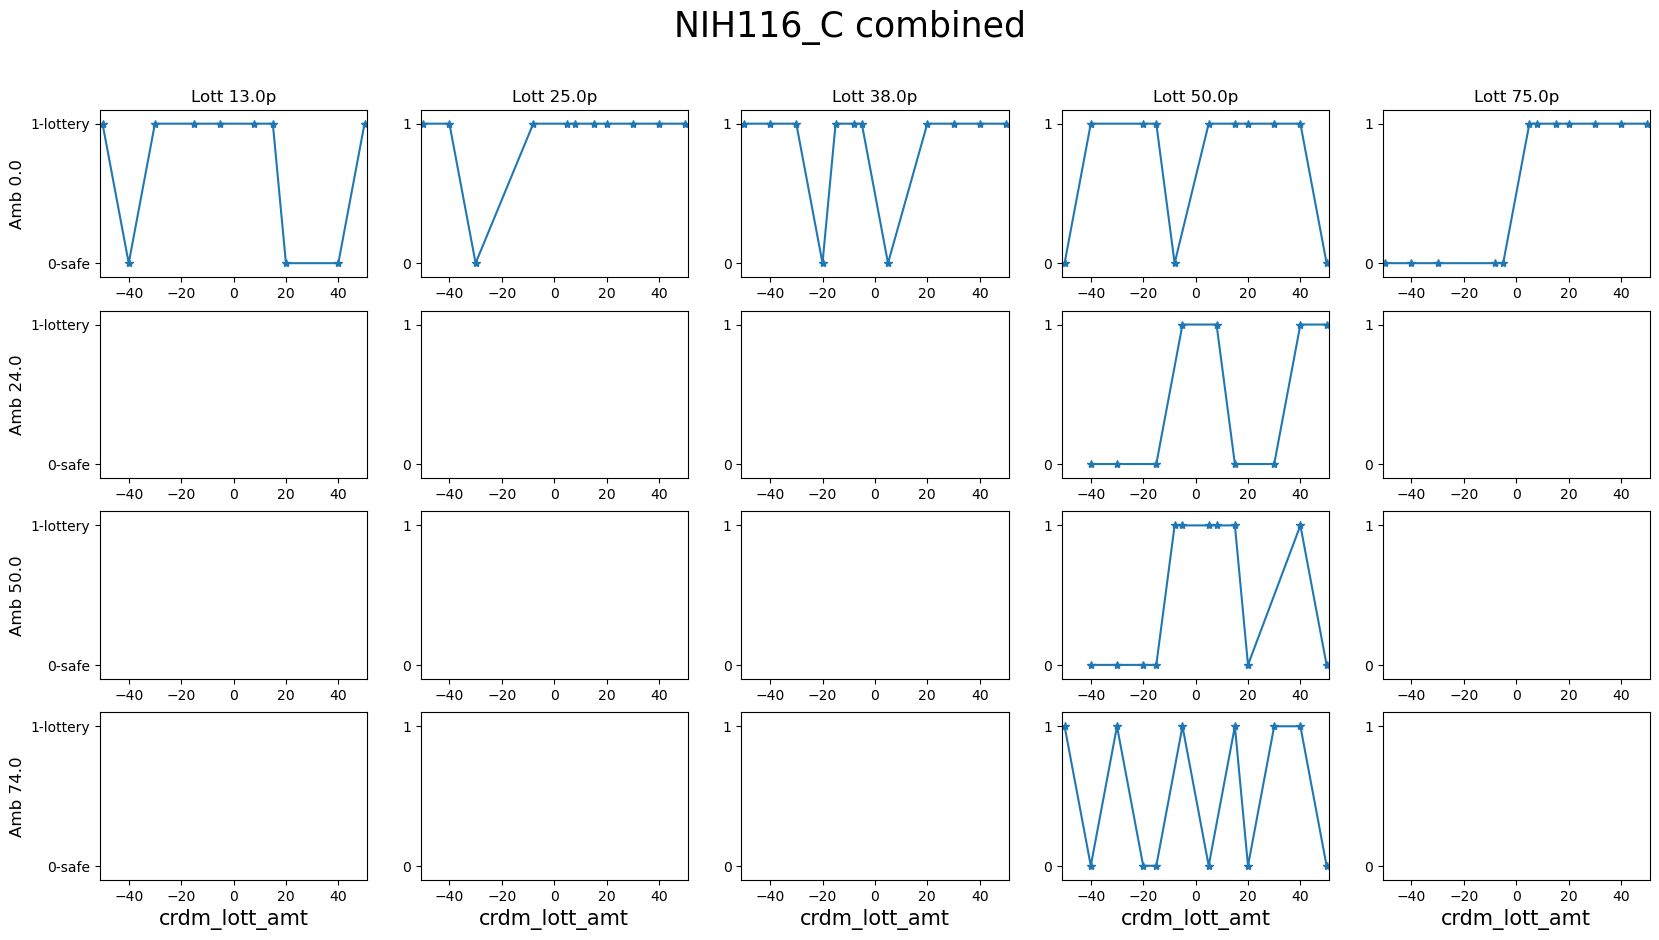

z:/datasets/ICR\split\NIH116_R2\crdm\NIH116_R2_crdm.csv
Working on this domain: gain
**WARNING** We dropped 5 rows from column crdm_conf_resp.keys containing >>>None<<<

Saving to: z:/datasets/ICR\utility\NIH116_R2\crdm/NIH116_R2_crdm_lottery_amt_choice_gain.csv
Saving to: z:/datasets/ICR\utility\NIH116_R2\crdm/NIH116_R2_crdm_plot_lottery_amt_choice_gain.png


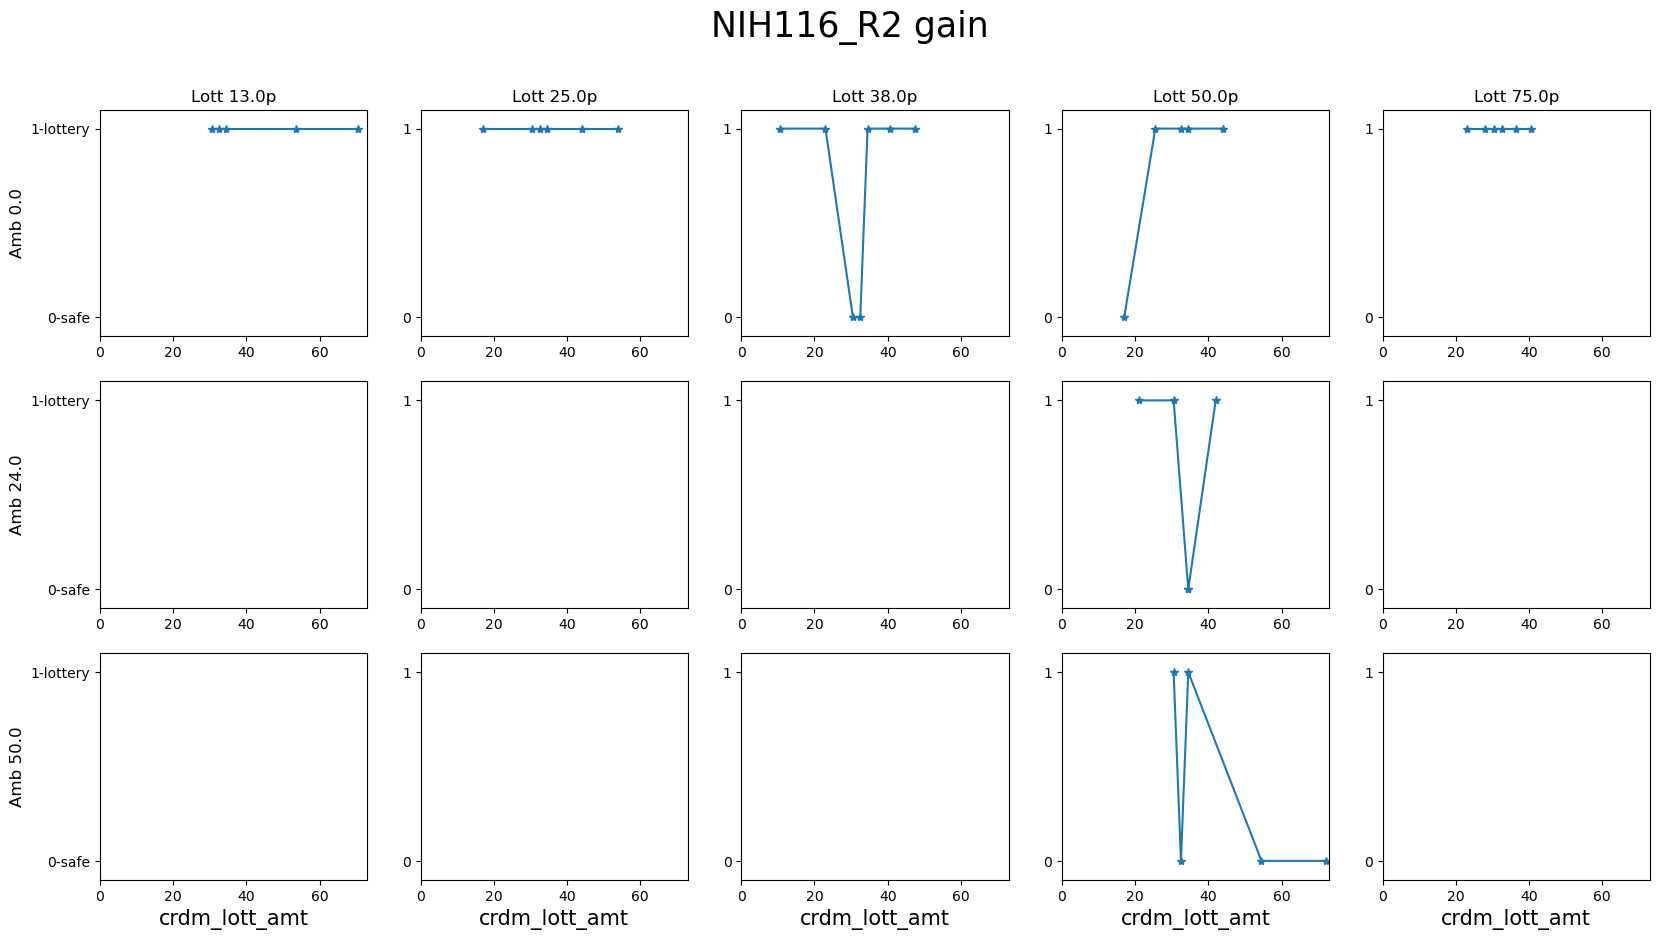

z:/datasets/ICR\split\NIH116_R2\crdm\NIH116_R2_crdm.csv
Working on this domain: loss
**WARNING** We dropped 2 rows from column crdm_conf_resp.keys containing >>>None<<<

Saving to: z:/datasets/ICR\utility\NIH116_R2\crdm/NIH116_R2_crdm_lottery_amt_choice_loss.csv
Saving to: z:/datasets/ICR\utility\NIH116_R2\crdm/NIH116_R2_crdm_plot_lottery_amt_choice_loss.png


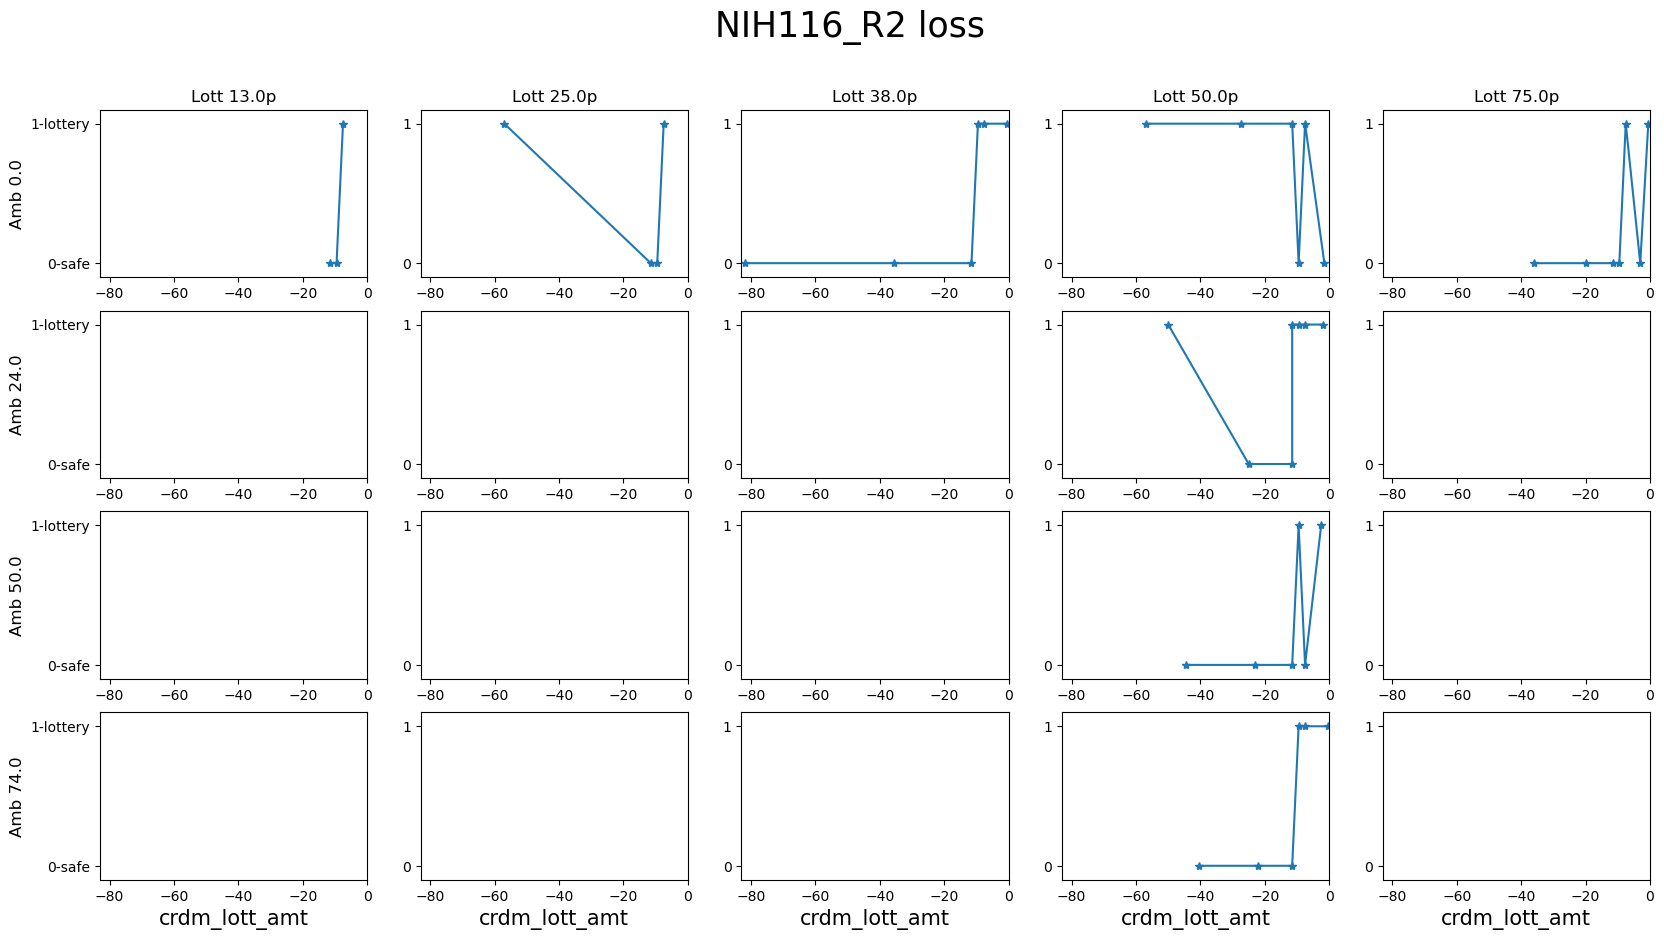

z:/datasets/ICR\split\NIH116_R2\crdm\NIH116_R2_crdm.csv
**WARNING** We dropped 7 rows from column crdm_conf_resp.keys containing >>>None<<<



C:\Users\guardomayas2\AppData\Local\Temp\ipykernel_1312\2149383568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['responded'] = df['crdm_trial_resp.keys'].notna()


Saving to: z:/datasets/ICR\utility\NIH116_R2\crdm/NIH116_R2_crdm_lottery_amt_choice_combined.csv
Saving to: z:/datasets/ICR\utility\NIH116_R2\crdm/NIH116_R2_crdm_plot_lottery_amt_choice_combined.png


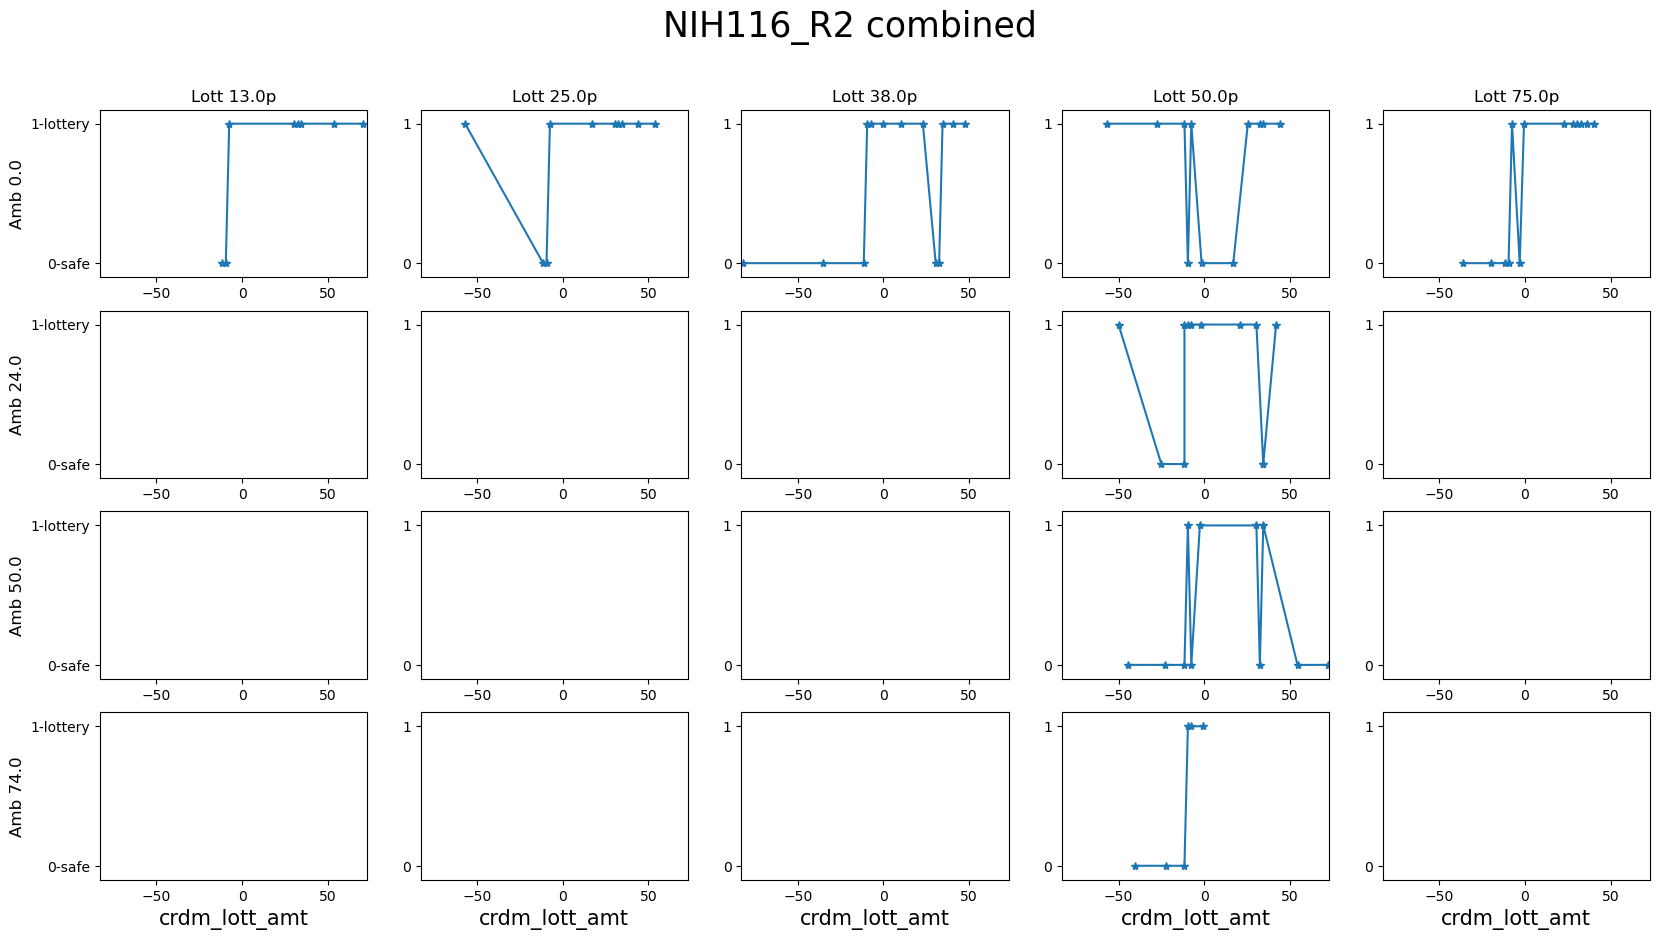

z:/datasets/ICR\split\NIH116_R\crdm\NIH116_R_crdm.csv
Working on this domain: gain
**WARNING** We dropped 11 rows from column crdm_conf_resp.keys containing >>>None<<<



C:\Users\guardomayas2\AppData\Local\Temp\ipykernel_1312\2149383568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['responded'] = df['crdm_trial_resp.keys'].notna()


Saving to: z:/datasets/ICR\utility\NIH116_R\crdm/NIH116_R_crdm_lottery_amt_choice_gain.csv
Saving to: z:/datasets/ICR\utility\NIH116_R\crdm/NIH116_R_crdm_plot_lottery_amt_choice_gain.png


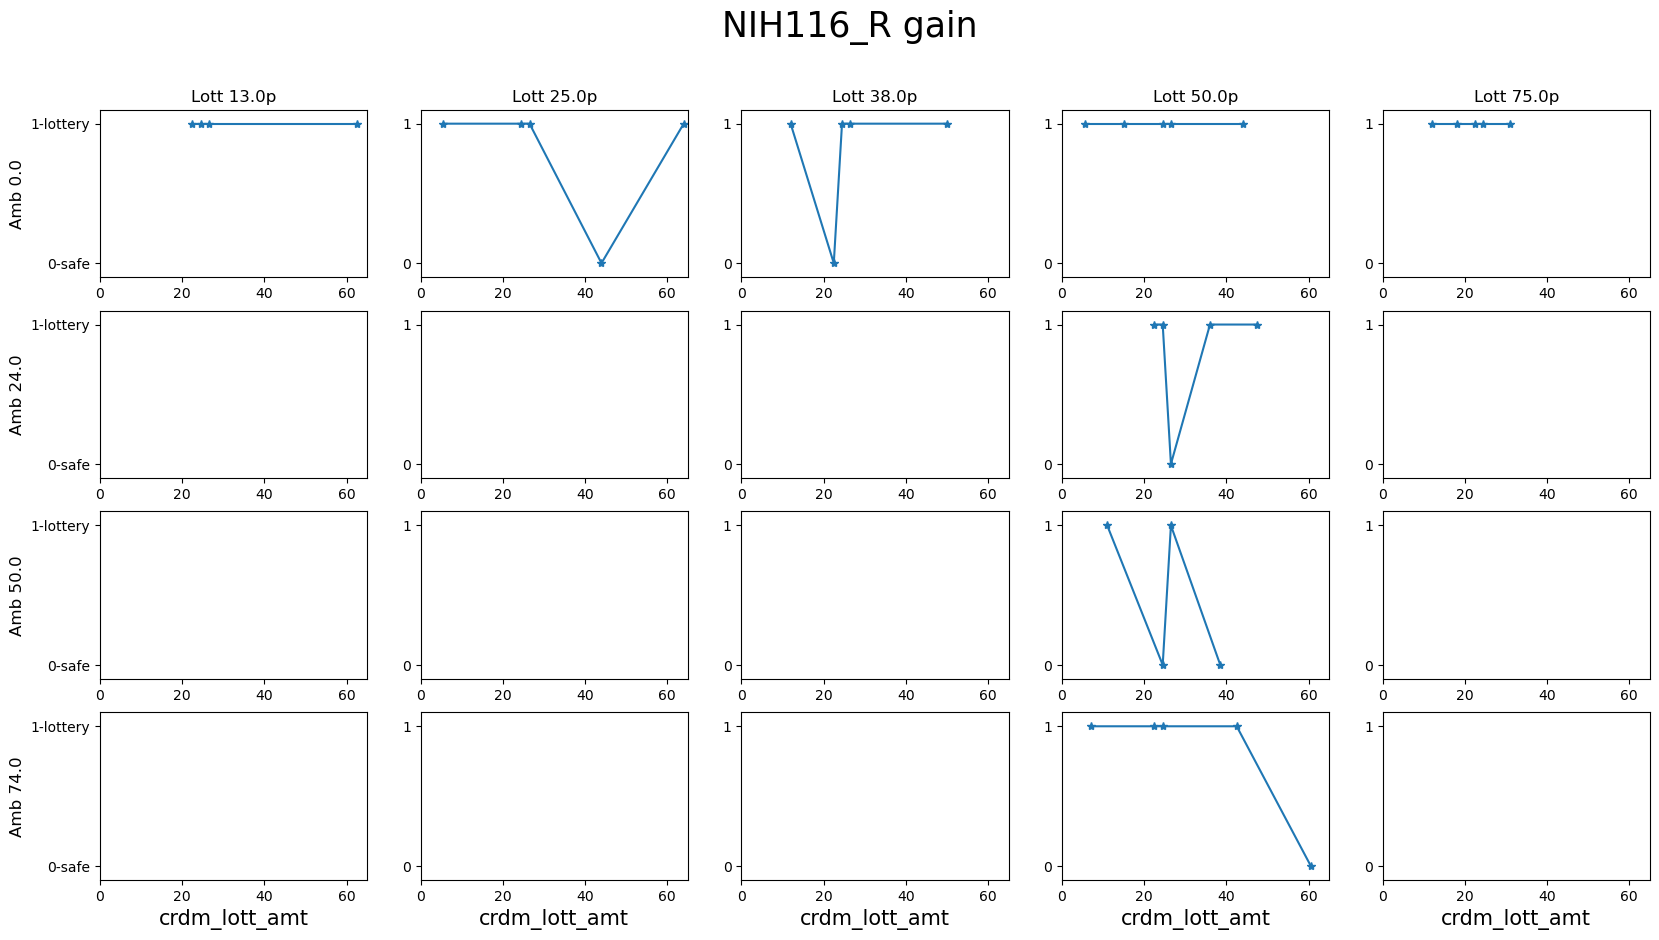

z:/datasets/ICR\split\NIH116_R\crdm\NIH116_R_crdm.csv
Working on this domain: loss
**WARNING** We dropped 12 rows from column crdm_conf_resp.keys containing >>>None<<<



C:\Users\guardomayas2\AppData\Local\Temp\ipykernel_1312\2149383568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['responded'] = df['crdm_trial_resp.keys'].notna()


Saving to: z:/datasets/ICR\utility\NIH116_R\crdm/NIH116_R_crdm_lottery_amt_choice_loss.csv
Saving to: z:/datasets/ICR\utility\NIH116_R\crdm/NIH116_R_crdm_plot_lottery_amt_choice_loss.png


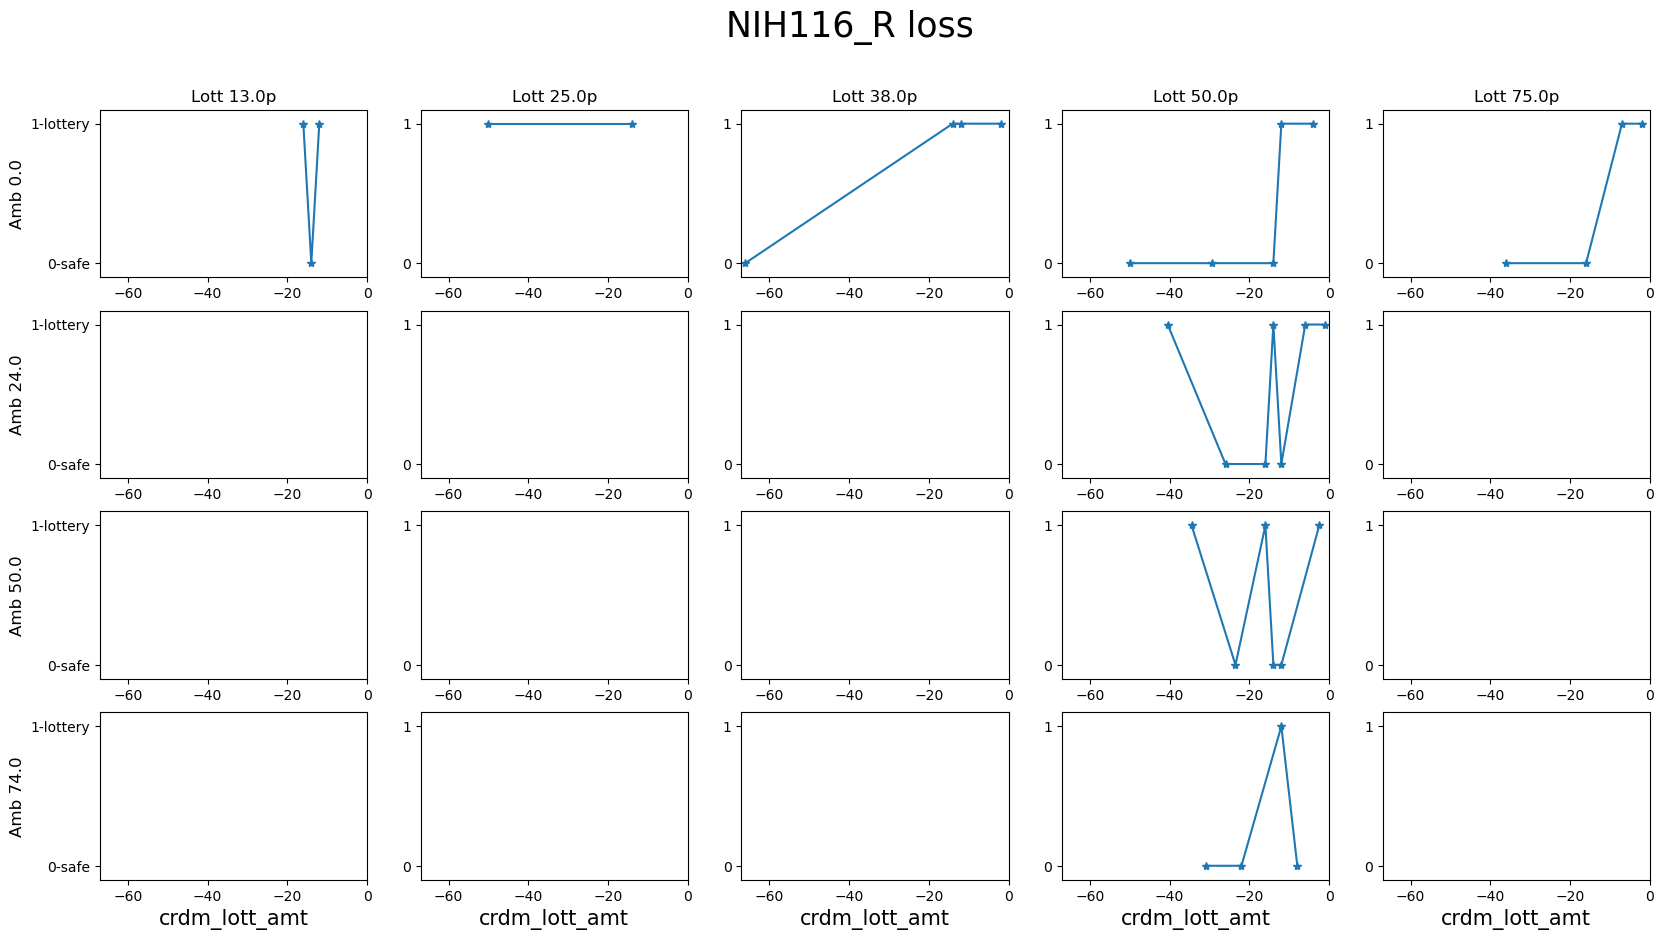

z:/datasets/ICR\split\NIH116_R\crdm\NIH116_R_crdm.csv
**WARNING** We dropped 23 rows from column crdm_conf_resp.keys containing >>>None<<<



C:\Users\guardomayas2\AppData\Local\Temp\ipykernel_1312\2149383568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['responded'] = df['crdm_trial_resp.keys'].notna()


Saving to: z:/datasets/ICR\utility\NIH116_R\crdm/NIH116_R_crdm_lottery_amt_choice_combined.csv
Saving to: z:/datasets/ICR\utility\NIH116_R\crdm/NIH116_R_crdm_plot_lottery_amt_choice_combined.png


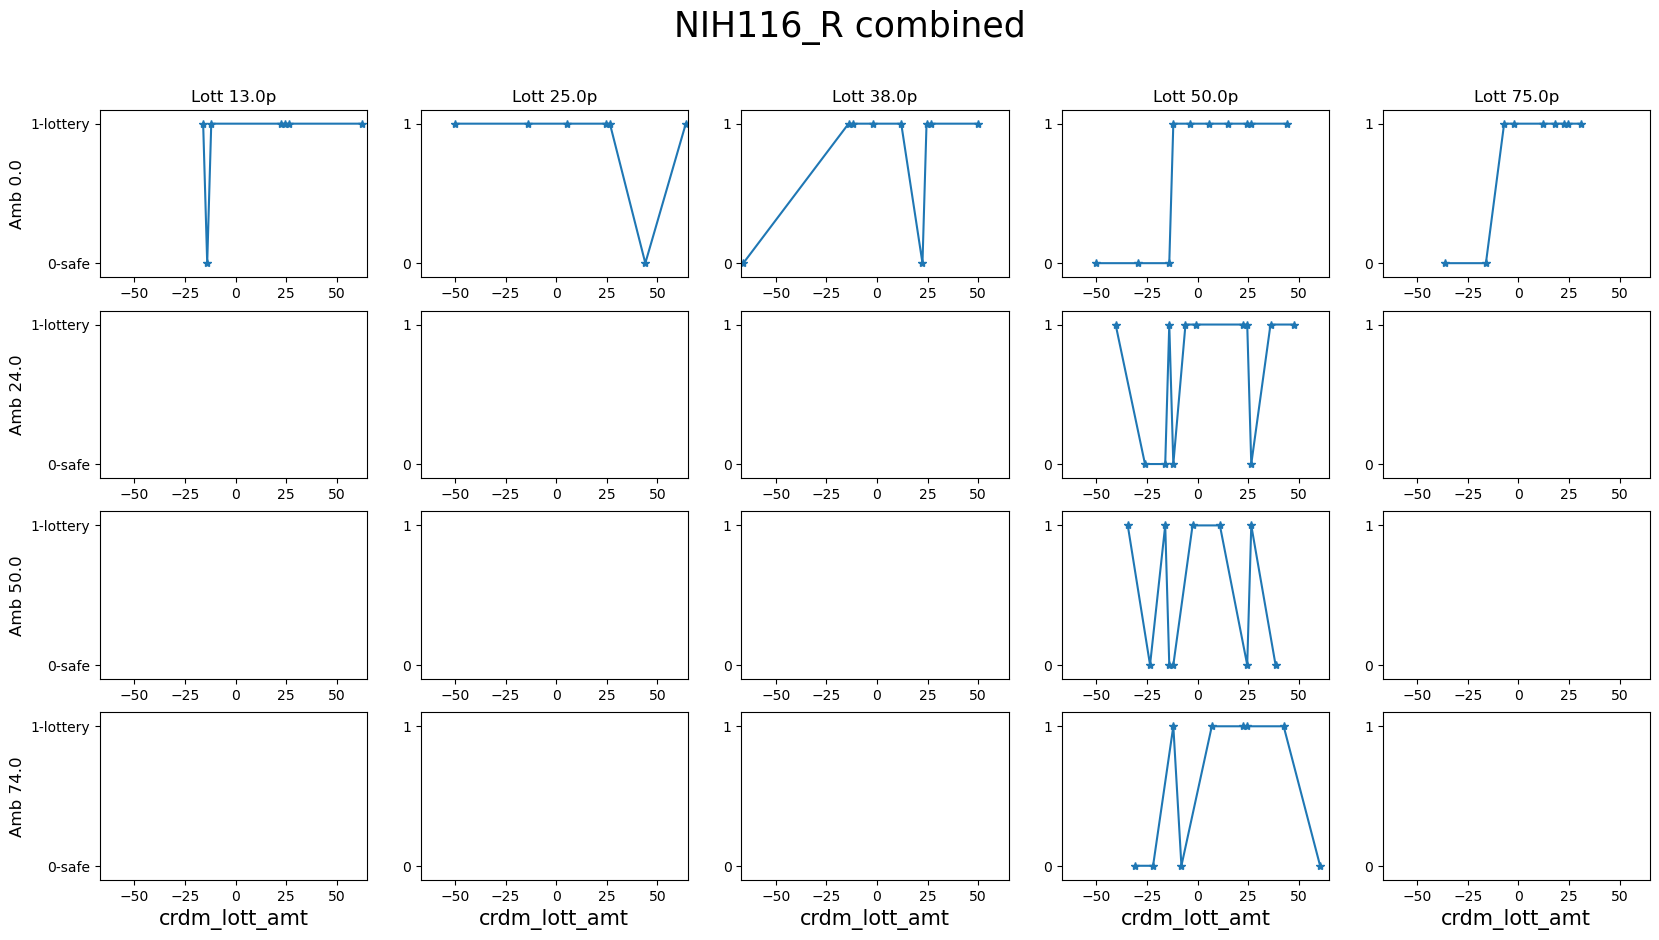

z:/datasets/ICR\split\NIH117_C\crdm\NIH117_C_crdm.csv
Working on this domain: gain


C:\Users\guardomayas2\AppData\Local\Temp\ipykernel_1312\2149383568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['responded'] = df['crdm_trial_resp.keys'].notna()


Saving to: z:/datasets/ICR\utility\NIH117_C\crdm/NIH117_C_crdm_lottery_amt_choice_gain.csv
Saving to: z:/datasets/ICR\utility\NIH117_C\crdm/NIH117_C_crdm_plot_lottery_amt_choice_gain.png


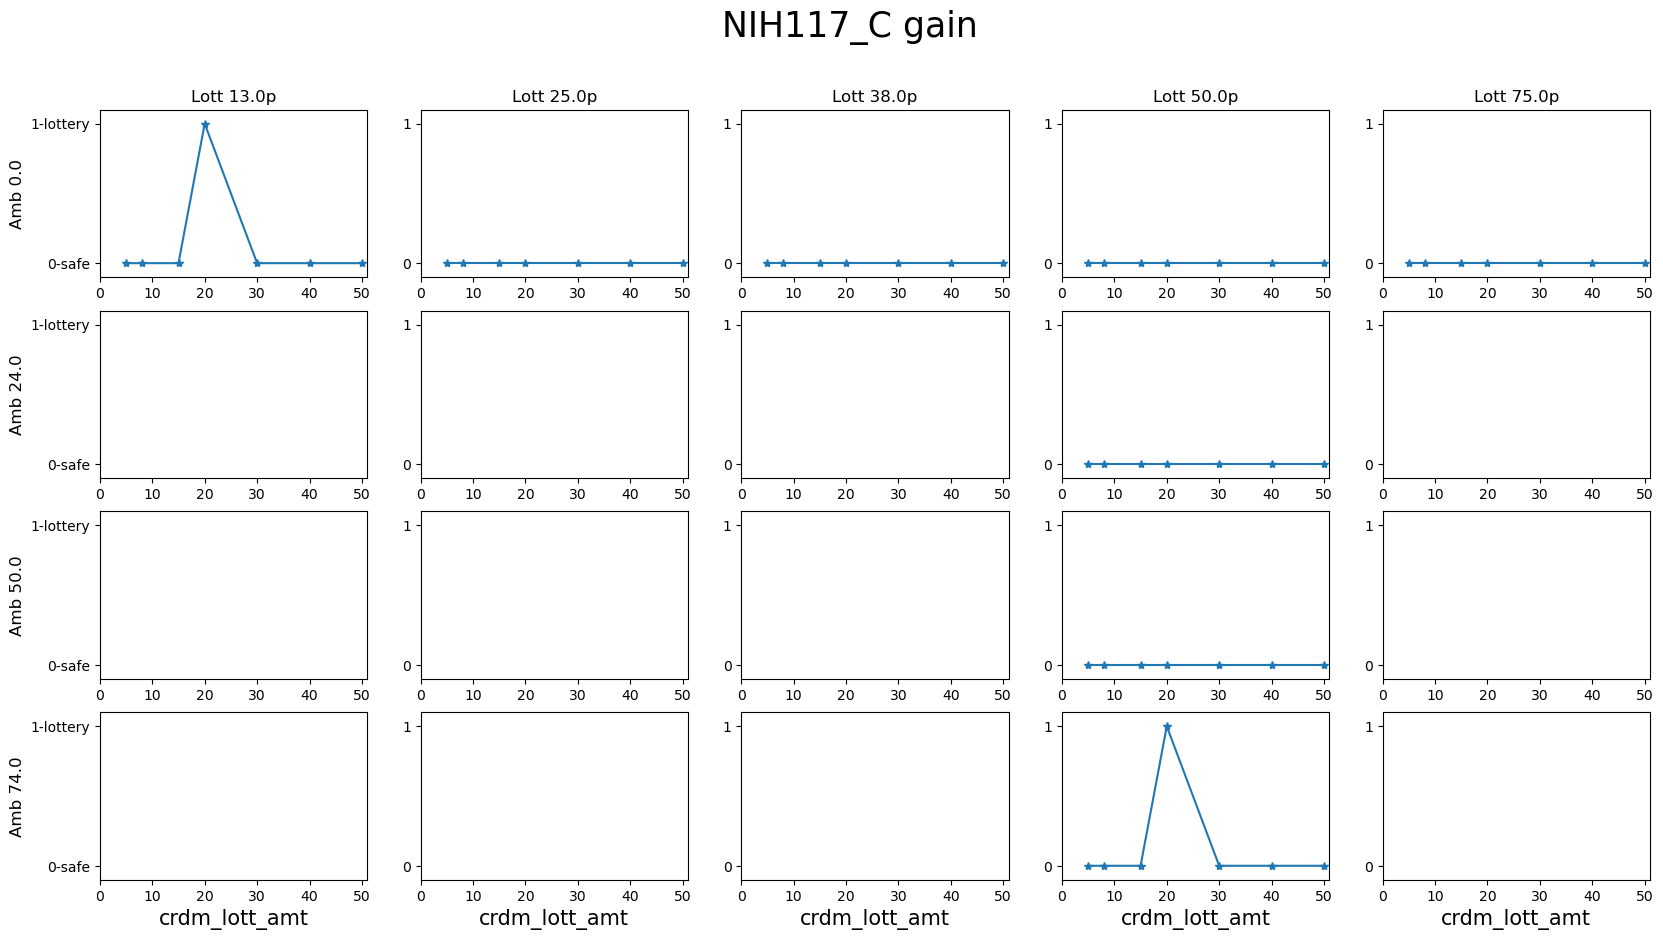

z:/datasets/ICR\split\NIH117_C\crdm\NIH117_C_crdm.csv
Working on this domain: loss


C:\Users\guardomayas2\AppData\Local\Temp\ipykernel_1312\2149383568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['responded'] = df['crdm_trial_resp.keys'].notna()


Saving to: z:/datasets/ICR\utility\NIH117_C\crdm/NIH117_C_crdm_lottery_amt_choice_loss.csv
Saving to: z:/datasets/ICR\utility\NIH117_C\crdm/NIH117_C_crdm_plot_lottery_amt_choice_loss.png


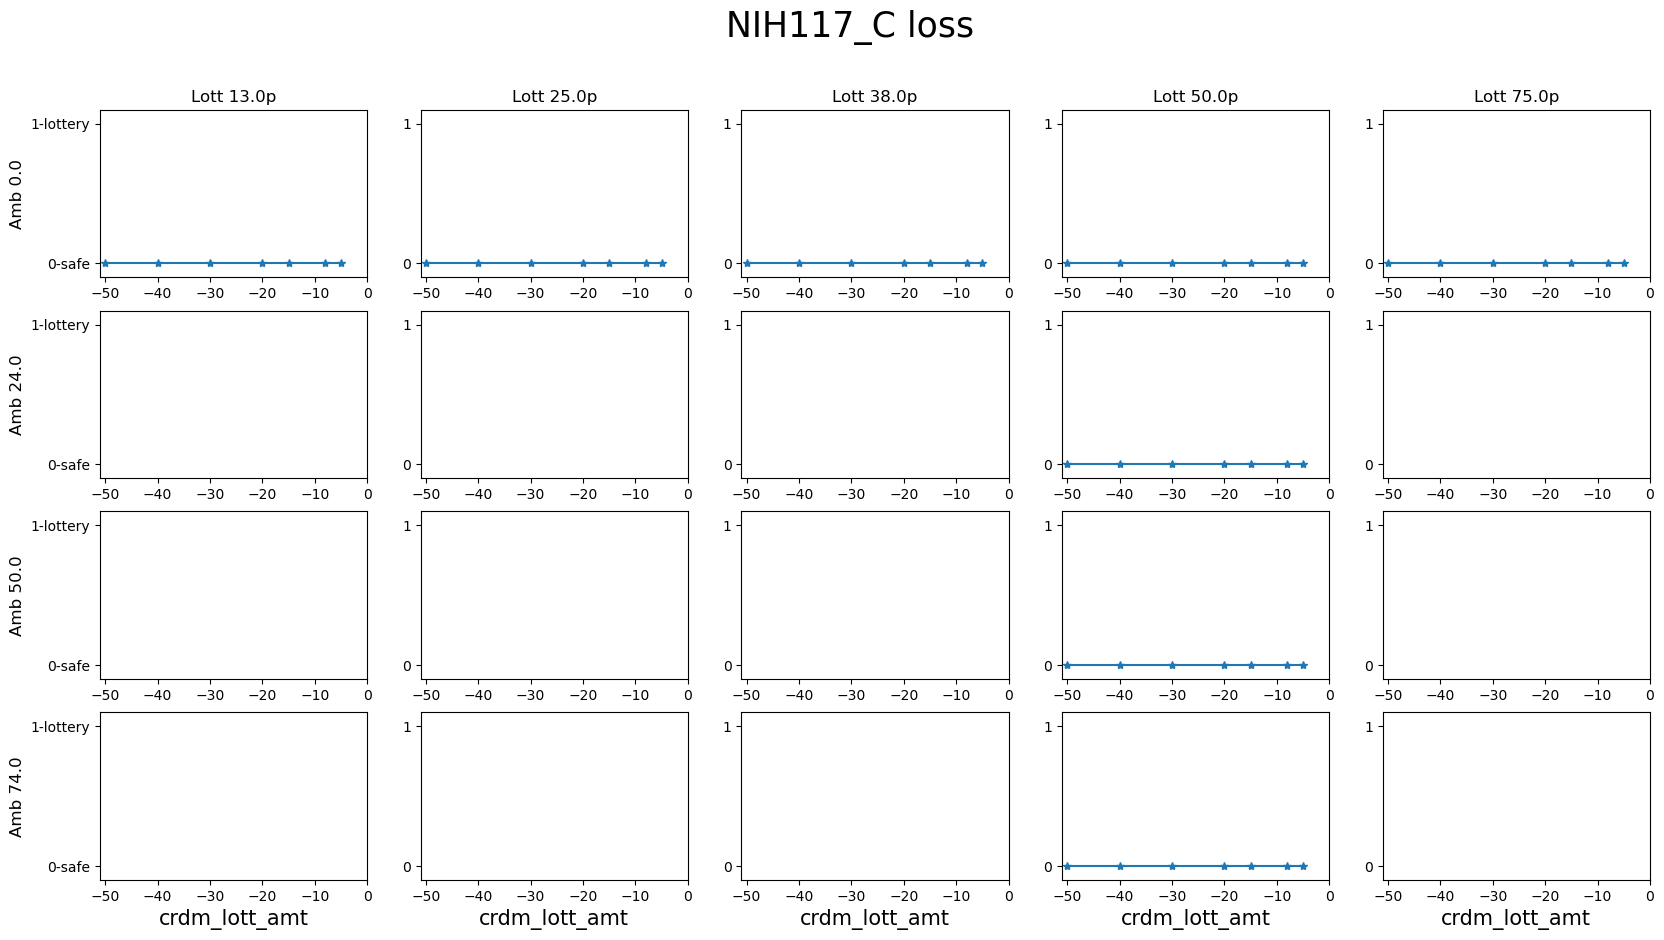

z:/datasets/ICR\split\NIH117_C\crdm\NIH117_C_crdm.csv


C:\Users\guardomayas2\AppData\Local\Temp\ipykernel_1312\2149383568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['responded'] = df['crdm_trial_resp.keys'].notna()


Saving to: z:/datasets/ICR\utility\NIH117_C\crdm/NIH117_C_crdm_lottery_amt_choice_combined.csv
Saving to: z:/datasets/ICR\utility\NIH117_C\crdm/NIH117_C_crdm_plot_lottery_amt_choice_combined.png


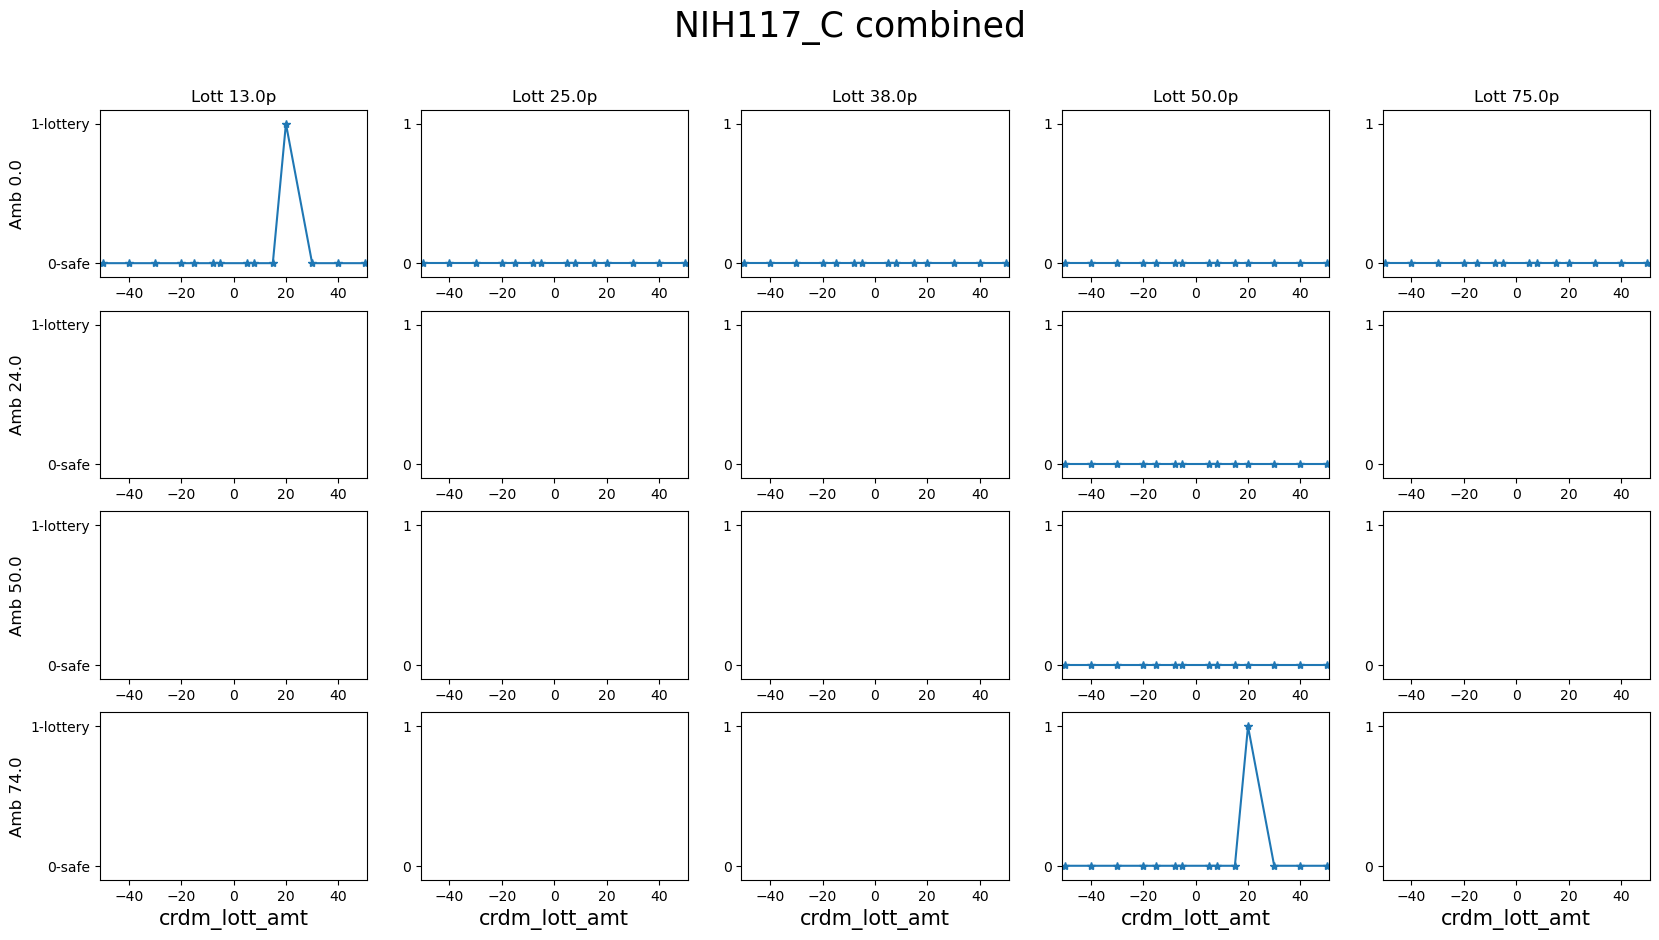

z:/datasets/ICR\split\NIH117_R\crdm\NIH117_R_crdm.csv
Working on this domain: gain

**WARNING** We dropped 1 of 50 non responses that were left blank


C:\Users\guardomayas2\AppData\Local\Temp\ipykernel_1312\2149383568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['responded'] = df['crdm_trial_resp.keys'].notna()


Saving to: z:/datasets/ICR\utility\NIH117_R\crdm/NIH117_R_crdm_lottery_amt_choice_gain.csv
Saving to: z:/datasets/ICR\utility\NIH117_R\crdm/NIH117_R_crdm_plot_lottery_amt_choice_gain.png


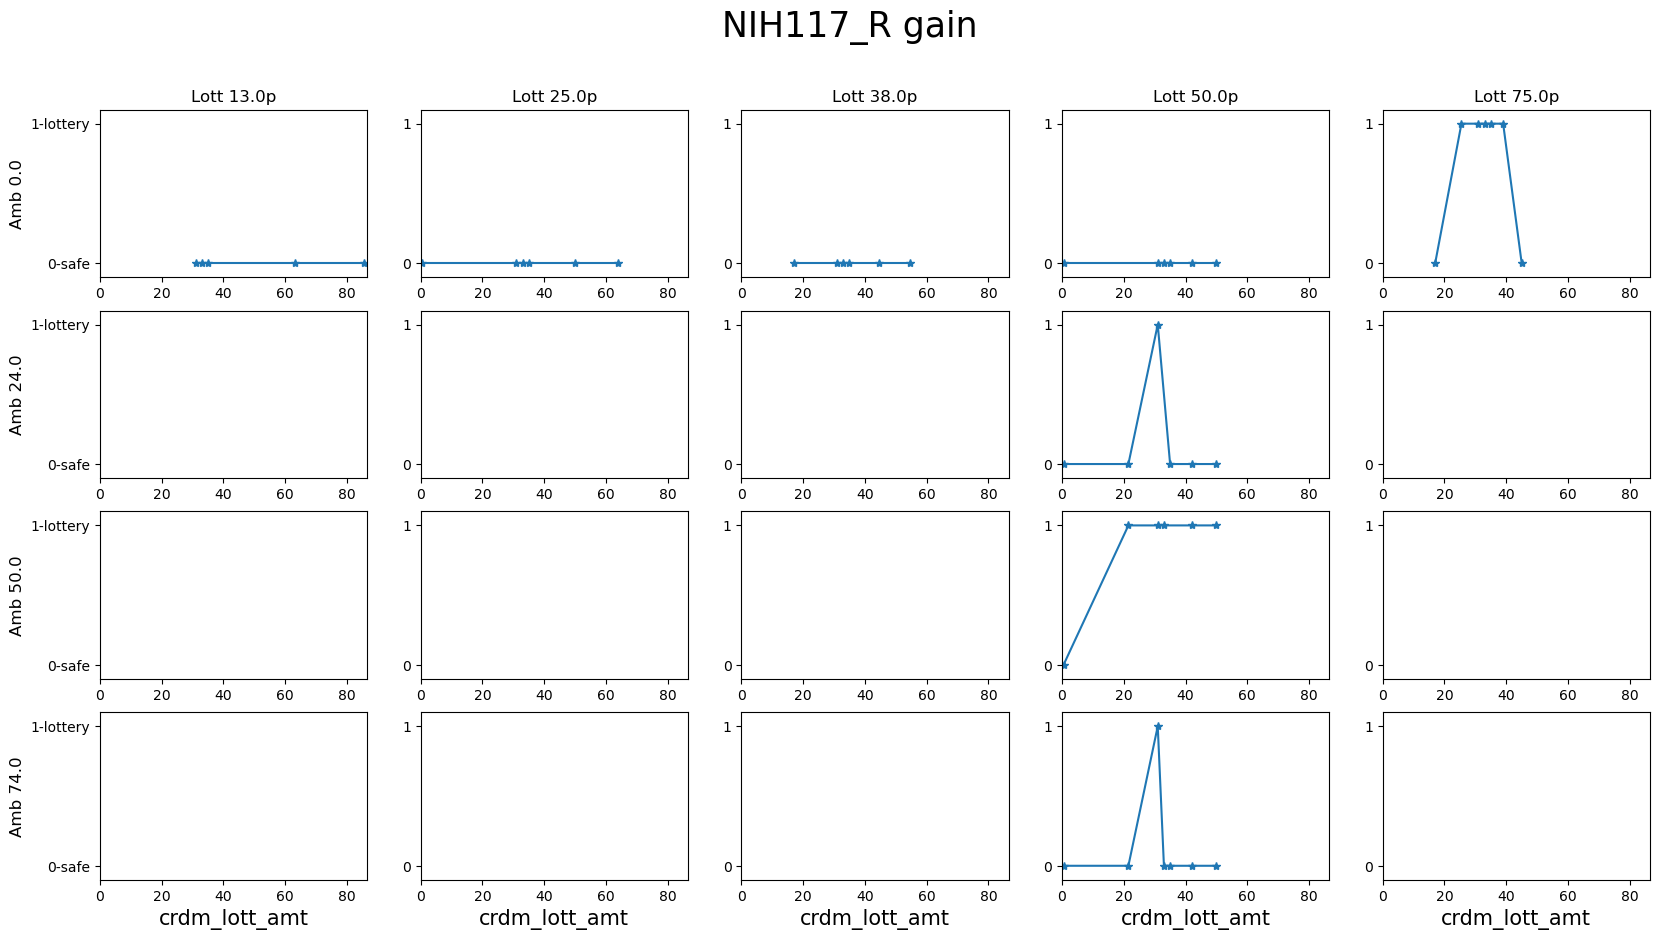

z:/datasets/ICR\split\NIH117_R\crdm\NIH117_R_crdm.csv
Working on this domain: loss

**WARNING** We dropped 1 of 50 non responses that were left blank


C:\Users\guardomayas2\AppData\Local\Temp\ipykernel_1312\2149383568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['responded'] = df['crdm_trial_resp.keys'].notna()


Saving to: z:/datasets/ICR\utility\NIH117_R\crdm/NIH117_R_crdm_lottery_amt_choice_loss.csv
Saving to: z:/datasets/ICR\utility\NIH117_R\crdm/NIH117_R_crdm_plot_lottery_amt_choice_loss.png


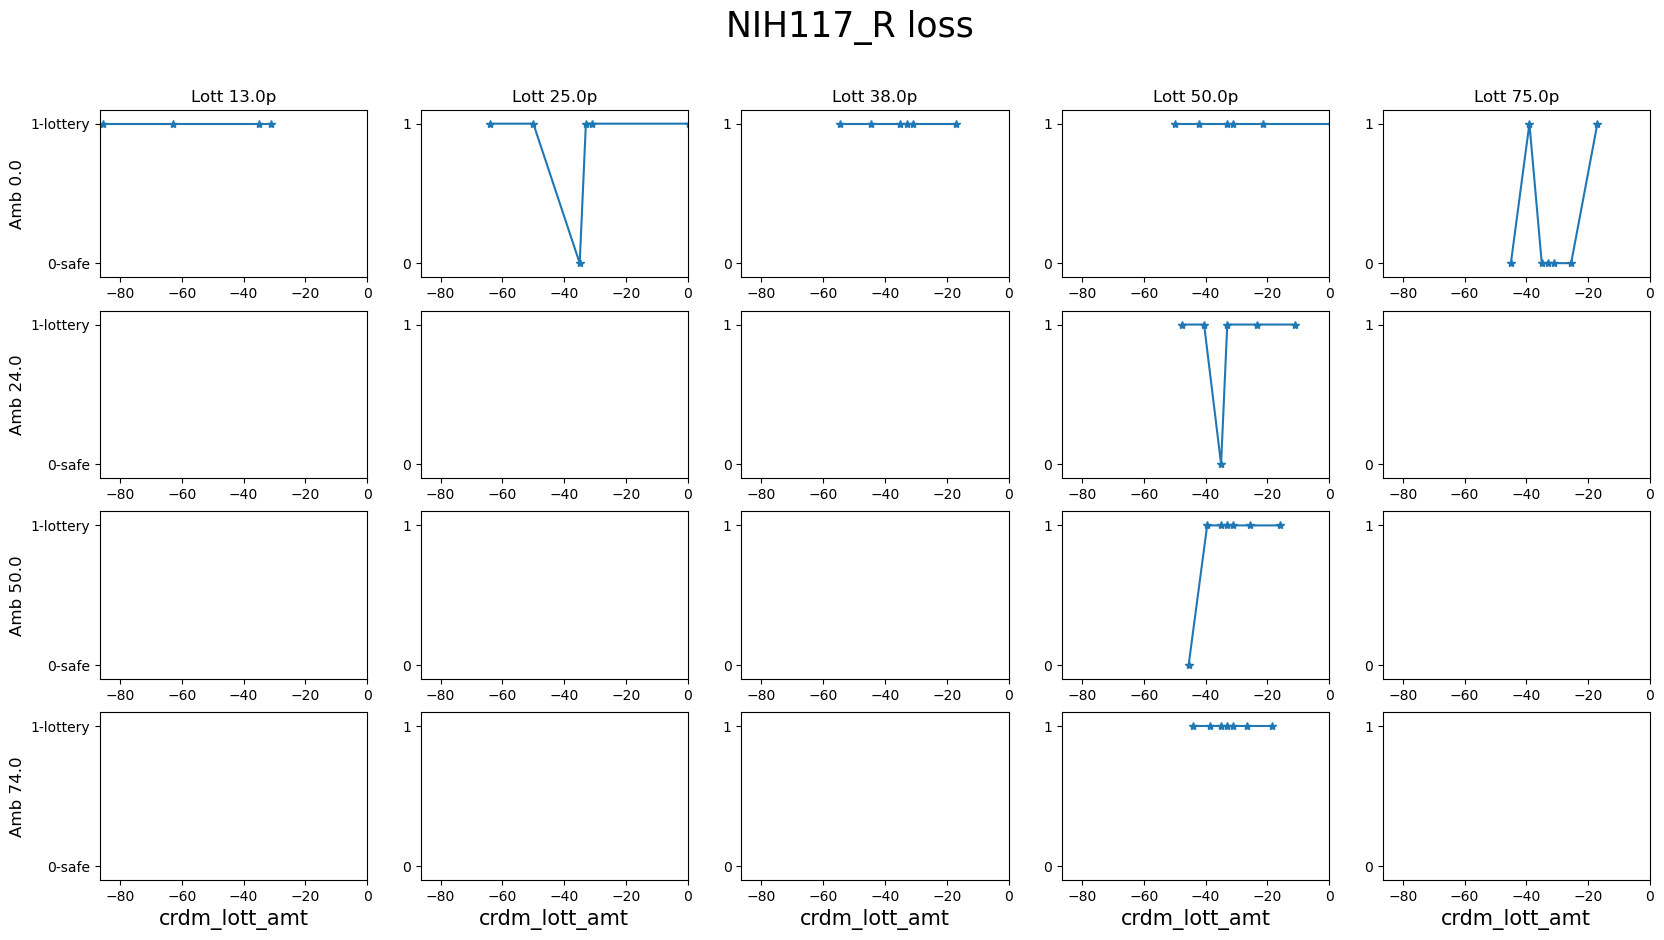

z:/datasets/ICR\split\NIH117_R\crdm\NIH117_R_crdm.csv

**WARNING** We dropped 2 of 100 non responses that were left blank


C:\Users\guardomayas2\AppData\Local\Temp\ipykernel_1312\2149383568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['responded'] = df['crdm_trial_resp.keys'].notna()


Saving to: z:/datasets/ICR\utility\NIH117_R\crdm/NIH117_R_crdm_lottery_amt_choice_combined.csv
Saving to: z:/datasets/ICR\utility\NIH117_R\crdm/NIH117_R_crdm_plot_lottery_amt_choice_combined.png


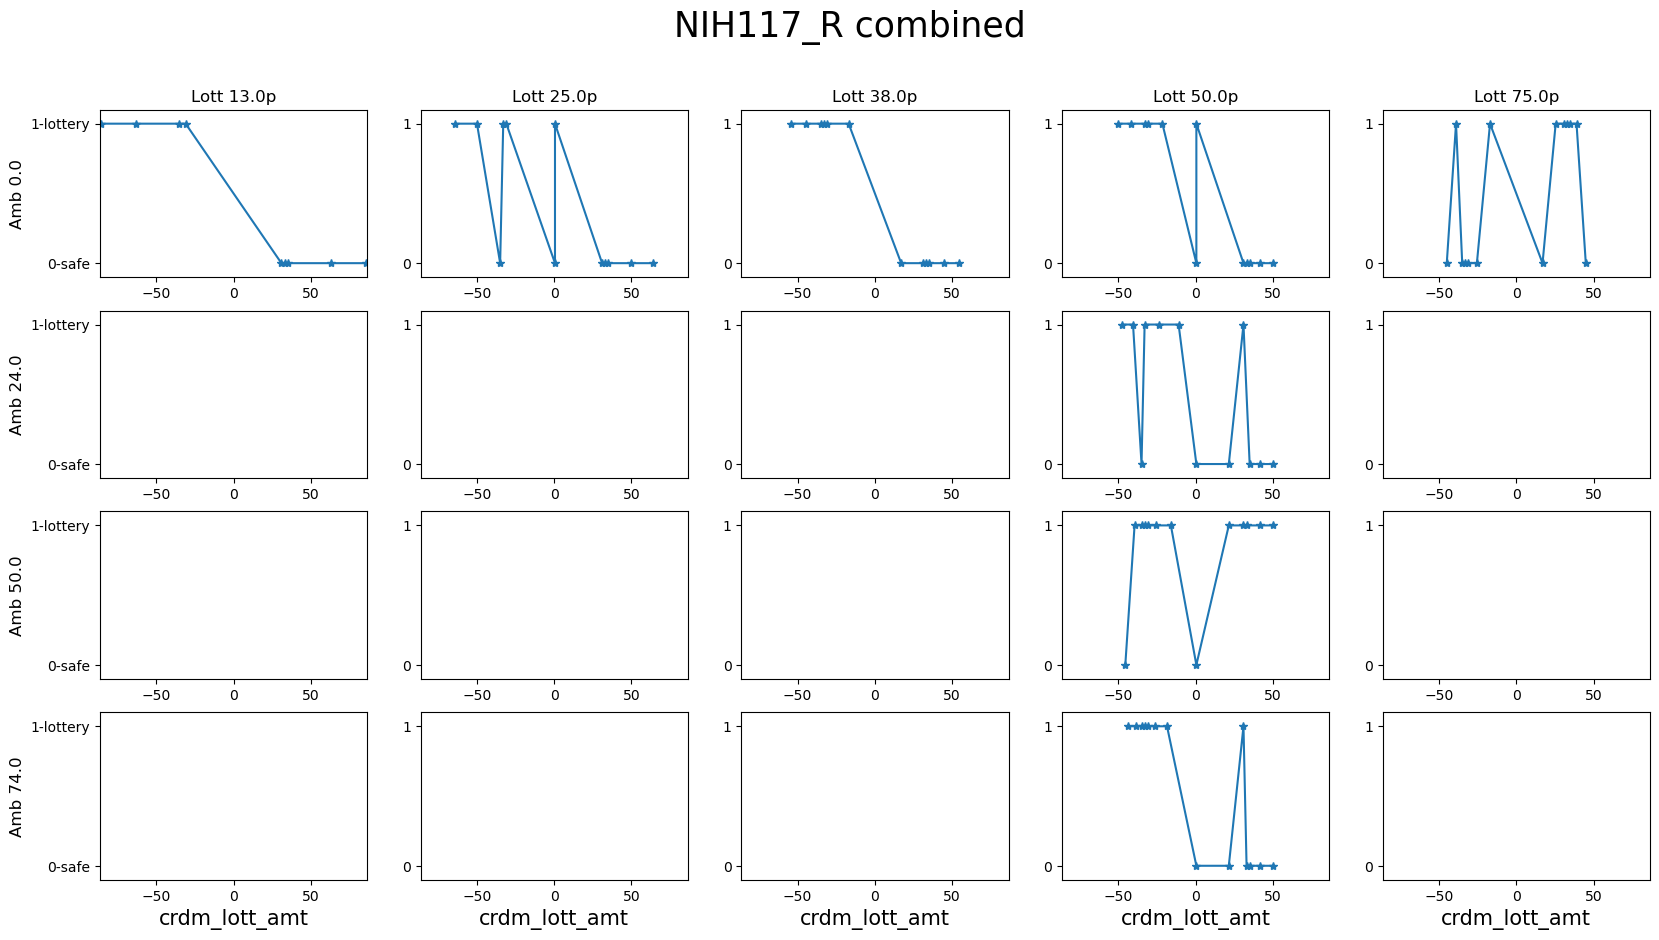

In [84]:
cols = ['crdm_amb_lev','crdm_sure_amt','crdm_lott_p','crdm_lott_amt']

# crdm_lott_p
xcol=cols[2]
# ambig lev
ycol=cols[0]

# ylabels = ['Immediate $2','Immediate $5', 'Immediate $15']
# titles = ['Delay Wait: Now', 'Delay Wait: 1 month','Delay Wait: 3 months','Delay Wait: 12 months','Delay Wait: 60 months']

xax = cols[3]
yax = 'crdm_choice'

fn_list = sorted(glob.glob(os.path.join(split_dir,'NIH*/crdm/*.csv')))

for i, subj_fn in enumerate(fn_list):

  for domain in ['gain','loss','combined']:

    # cols defined above
    delay_amt_choice_df = pd.DataFrame(columns=['frequency','choice']+cols)

    print(subj_fn)
    df = pd.read_csv(subj_fn)
    #Adding the lotterys
    df['crdm_lott_amt'] = df['crdm_lott_bot'] +  df['crdm_lott_top']
    if 'combined' not in domain:
      df = get_by_domain(df,domain=domain,task='crdm',verbose=True)
    df = drop_blank(df)
    conf_resp = get_confresp(df,task='crdm')
    df = drop_by_str(df,col=conf_resp,match_str='None')[0]

    ylabels = ['Amb 0.0','Amb 24.0', 'Amb 50.0', 'Amb 74.0']
    xtitle = ['Lott 13.0p', 'Lott 25.0p','Lott 38.0p','Lott 50.0p','Lott 75.0p']
    # ylabels = get_labels(df,col=ycol)
    # xtitle = get_labels(df,col=xcol)

    plt.figure(i,figsize=(20,10))
    xcol_vals = sorted(df[xcol].unique())
    ycol_vals = sorted(df[ycol].unique())
    index=0
    #loop through each delay-wait subgroup for each smaller sooner amount 
    for iy, yv in enumerate(ycol_vals):
      for ix, xv in enumerate(xcol_vals):
        # index = 1+iy+(len(xcol_vals)*ix)
        # print('({},{}) with ({},{}) and index: {}'.format(ix,iy,xv,yv,index))
        # print('title:{} ylabel: {}'.format(xtitle[ix],ylabels[iy]))
        index += 1
        plt.subplot(len(ycol_vals),len(xcol_vals),index)
        plt.ylim([-0.1,1.1])
        plt.xlim([df[xax].min()-1,df[xax].max()+1])
        if domain=='gain':
          plt.xlim([0,df[xax].max()+1])
        elif domain=='loss':
          plt.xlim([df[xax].min()-1,0])

        if (ix == 0):
          plt.ylabel(ylabels[iy],fontsize=12)
          plt.yticks([0,1],['0-safe','1-lottery'])
        else:
          plt.yticks([0,1])
        if (iy == 0):
          plt.title(xtitle[ix],fontsize=12)
        # if (iy < len(ycol_vals)+1):
        #   plt.xticks([])
        if (iy == len(ycol_vals)-1):
          plt.xlabel(xax,fontsize=15)
        
        x = []
        y = []
        #get dataframe with the appropriate smaller sooner and delay-wait time values
        idf = df.loc[(df[xcol] == xv) & (df[ycol] == yv)]
        if not len(idf):

          continue
        x = x + idf[xax].tolist()
        y = y + idf[yax].tolist()
        
        #used to fill .csv file for each participant's choices
        delay_amt_choice, count = count_tuples(list(zip(x,y)))
        this_df = pd.DataFrame(columns=cols)
        this_df["frequency"] = count
        this_df["choice"] = delay_amt_choice
        this_df[xcol] = xtitle[ix]
        this_df[ycol] = ylabels[iy]
        delay_amt_choice_df = pd.concat([delay_amt_choice_df,this_df],ignore_index=True)

        #sort by x and y in order to connect lines properly on final plots
        x,y = zip(*sorted(zip(x,y)))
        plt.plot(x,y,'*-')


    subj = get_subject(subj_fn)

    subj_crdm_dir = os.path.join(utility_dir,subj,'crdm')
    if not os.path.exists(subj_crdm_dir):
        print('Making subjects crdm directory : {}'.format(subj_crdm_dir))
        os.makedirs(subj_crdm_dir)

    fn = os.path.join(utility_dir,subj,'crdm/{}_crdm_lottery_amt_choice_{}.csv'.format(subj,domain))
    print("Saving to: {}".format(fn))
    delay_amt_choice_df.to_csv(fn)
    # print(delay_amt_choice_df)
    plt.suptitle('{} {}'.format(subj,domain), fontsize=25)
    # plt.suptitle('{}: {} ${}'.format(subj,cols[3],df[cols[3]].unique().item()), fontsize=25)
    fig_fn = os.path.join(utility_dir,subj,'crdm/{}_crdm_plot_lottery_amt_choice_{}.png'.format(subj,domain))
    print("Saving to: {}".format(fig_fn))
    plt.savefig(fig_fn)
    plt.show()
    #sys.exit()

